In [20]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import plotly
import optuna
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error
import optuna.visualization as vis
from xgboost import DMatrix, train

SEED = 314159
np.random.seed(314159)
NUM_FOLDS = 4

In [26]:
data_path = "C:/Users/code/assignment_2"
df = pd.read_csv(f"{data_path}/prepared_data.csv", index_col=0)
df.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          60         65.0     8450            7            5       2003   
1          20         80.0     9600            6            8       1976   
2          60         68.0    11250            7            5       2001   
3          70         60.0     9550            7            5       1915   
4          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  SaleType_ConLw  \
0          2003       196.0         706           0  ...           False   
1          1976         0.0         978           0  ...           False   
2          2002       162.0         486           0  ...           False   
3          1970         0.0         216           0  ...           False   
4          2000       350.0         655           0  ...           False   

   SaleType_New  SaleType_Oth  SaleType_WD  SaleCondition_Abnorml  \
0         False         False         True                  False   
1         False         False         True                  False   
2         False         False         True                  False   
3         False         False         True                   True   
4         False         False         True                  False   

   SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                  False                 False                 False   
1                  False                 False                 False   
2                  False                 False                 False   
3                  False                 False                 False   
4                  False                 False                 False   

   SaleCondition_Normal  SaleCondition_Partial  
0                  True                  False  
1                  True                  False  
2                  True                  False  
3                 False                  False  
4                  True                  False  

[5 rows x 266 columns]

In [27]:
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=SEED)

Обучите случайный лес с помощью “mse”. Покажите разницу в точности на тестовом наборе. На каких примерах разница наиболее заметна?

In [28]:
rf = RandomForestRegressor(
    criterion='squared_error',
    n_estimators=100, 
    random_state=SEED,
    max_depth=8,
    oob_score=True,
).fit(X_train, y_train)

rf_ = RandomForestRegressor(
    criterion='absolute_error',
    n_estimators=100, 
    random_state=SEED,
    max_depth=8,
    oob_score=True,
).fit(X_train, y_train)

y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)

mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
mse_cross_val = cross_val_score(rf, X, y, cv=5, scoring='neg_mean_squared_error')

y_pred_train_ = rf_.predict(X_train)
y_pred_test_ = rf_.predict(X_test)

mae_train = mean_absolute_error(y_train, y_pred_train_)
mae_test = mean_absolute_error(y_test, y_pred_test_)
mae_cross_val = cross_val_score(rf, X, y, cv=5, scoring='neg_mean_absolute_error')

print(f"train MSE : {mse_train}")
print(f"cross val MSE: {np.mean(-mse_cross_val)}")
print(f"test MSE: {mse_test}")
print('------------------')
print(f"train MAE : {mae_train}")
print(f"cross val MAE: {np.mean(-mae_cross_val)}")
print(f"test MAE: {mae_test}")

train MSE : 0.005225147632012523
cross val MSE: 0.021030168522766467
test MSE: 0.024985389057049532
------------------
train MAE : 0.057742427405724196
cross val MAE: 0.09818597635094002
test MAE: 0.10979715023238212


In [29]:
errors = np.abs(y_test - y_pred_test_)
df_big_errors = df.loc[errors.nlargest(6).index]
df_big_errors['errors'] = errors[errors.nlargest(6).index]
df_big_errors

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
523           60        130.0    40094           10            5       2007   
916           20         50.0     9000            2            3       1949   
410           20         68.0     9571            5            3       1958   
462           20         60.0     8281            5            5       1965   
1323          20         75.0     9986            8            5       2006   
1324          30         40.0     3636            4            4       1922   

      YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  SaleType_New  \
523           2008       762.0        2260           0  ...          True   
916           1950         0.0          50           0  ...         False   
410           1958         0.0           0           0  ...         False   
462           1965         0.0         553         311  ...         False   
1323          2007       428.0           0           0  ...          True   
1324          1950         0.0           0           0  ...         False   

      SaleType_Oth  SaleType_WD  SaleCondition_Abnorml  SaleCondition_AdjLand  \
523          False        False                  False                  False   
916          False         True                   True                  False   
410          False        False                   True                  False   
462          False         True                  False                  False   
1323         False        False                  False                  False   
1324         False         True                  False                  False   

      SaleCondition_Alloca  SaleCondition_Family  SaleCondition_Normal  \
523                  False                 False                 False   
916                  False                 False                 False   
410                  False                 False                 False   
462                  False                 False                  True   
1323                 False                 False                 False   
1324                 False                 False                  True   

      SaleCondition_Partial    errors  
523                    True  1.163606  
916                   False  0.712781  
410                   False  0.711491  
462                   False  0.681454  
1323                   True  0.638277  
1324                  False  0.548734  

[6 rows x 267 columns]

Повторите шаги из пункта 3 для градиентного бустинга. Проведите анализ зависимости точности от параметров (то, что оценивать, выберите сами.  Покажите, как еще можно оценивать такие модели.

In [30]:
def mse_eval(preds, dtrain):
    labels = dtrain.get_label()
    return 'mse', mean_squared_error(labels, preds)
def objective(trial):
    eta = trial.suggest_float('eta', 0.01, 0.3, log=True)
    max_depth = trial.suggest_int('max_depth', 3, 10)
    subsample = trial.suggest_float('subsample', 0.6, 1.0)
    colsample_bytree = trial.suggest_float('colsample_bytree', 0.6, 1.0)
    alpha = trial.suggest_float('alpha', 0.001, 10.0, log=True)
    lambda_val = trial.suggest_float('lambda', 0.001, 10.0, log=True)
    min_child_weight = trial.suggest_float('min_child_weight', 0.1, 10.0, log=True)
    gamma = trial.suggest_float('gamma', 0.01, 1.0, log=True)

    params = {
        'objective': 'reg:squarederror',
        'eta': eta,
        'max_depth': max_depth,
        'subsample': subsample,
        'colsample_bytree': colsample_bytree,
        'alpha': alpha,
        'lambda': lambda_val, 
        'min_child_weight': min_child_weight,
        'gamma': gamma,
        'seed': SEED
    }

    dtrain = xgb.DMatrix(X_train, label=y_train)
    cv_result = xgb.cv(params, dtrain, num_boost_round=10, nfold=NUM_FOLDS, custom_metric=mse_eval, early_stopping_rounds=50, seed=SEED)
    return cv_result['test-mse-mean'].iloc[-1]

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)  

vis.plot_contour(study).show()
vis.plot_optimization_history(study).show()
vis.plot_parallel_coordinate(study).show()
vis.plot_param_importances(study).show()
vis.plot_slice(study).show()

best_params = study.best_params

best_model = xgb.train(best_params, xgb.DMatrix(X_train, label=y_train), num_boost_round=1000)

y_pred = best_model.predict(xgb.DMatrix(X_test))
mse_test = mean_squared_error(y_test, y_pred_test)

print(f"Best parameters: {best_params}")
print(f"test MSE: {mse_test}")

[I 2024-06-11 13:53:22,232] A new study created in memory with name: no-name-50852d84-3535-480d-bc46-31d625f5ab4f
[I 2024-06-11 13:53:22,549] Trial 0 finished with value: 0.06783025 and parameters: {'eta': 0.09348193410569582, 'max_depth': 7, 'subsample': 0.8527835613965355, 'colsample_bytree': 0.8312105258353797, 'alpha': 7.409504479185154, 'lambda': 0.035757691054785094, 'min_child_weight': 0.14028989837118402, 'gamma': 0.20175944939721266}. Best is trial 0 with value: 0.06783025.
[I 2024-06-11 13:53:22,850] Trial 1 finished with value: 0.10278925 and parameters: {'eta': 0.02818828235635608, 'max_depth': 4, 'subsample': 0.8373253661650324, 'colsample_bytree': 0.9561839932078164, 'alpha': 0.0014117763409476356, 'lambda': 0.0015714680991166595, 'min_child_weight': 1.1327856762472441, 'gamma': 0.5761821037253119}. Best is trial 0 with value: 0.06783025.
[I 2024-06-11 13:53:23,144] Trial 2 finished with value: 0.02650125 and parameters: {'eta': 0.19439967630237312, 'max_depth': 4, 'subsa

Best parameters: {'eta': 0.2975480052264233, 'max_depth': 5, 'subsample': 0.8991834124626626, 'colsample_bytree': 0.8552568685335814, 'alpha': 0.049327023988307656, 'lambda': 0.06926704571466832, 'min_child_weight': 7.1181612914258015, 'gamma': 0.021297148854516584}
test MSE: 0.024985389057049532


какова связь между остатками и градиентом? Покажите в свободной форме, на примере (можно использовать формулы + графики/иллюстрации, набор данных взять любой, синтетический или реальный)

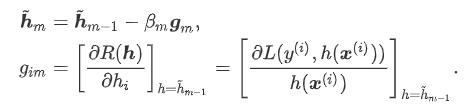

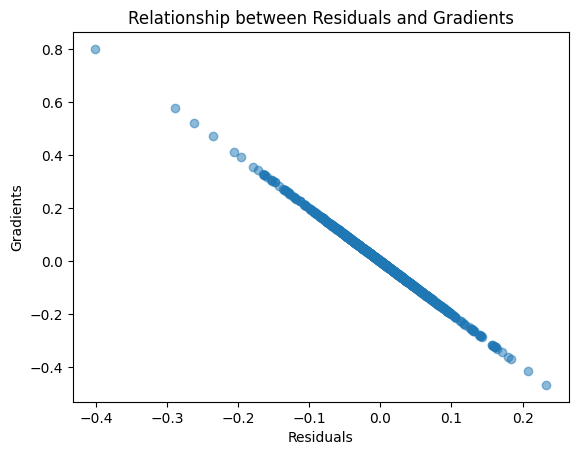

In [31]:
y_pred_train = best_model.predict(xgb.DMatrix(X_train))

residuals = y_train - y_pred_train

gradients = 2 * (y_pred_train - y_train)

plt.scatter(residuals, gradients, alpha=0.5)
plt.xlabel('Residuals')
plt.ylabel('Gradients')
plt.title('Relationship between Residuals and Gradients')
plt.show()

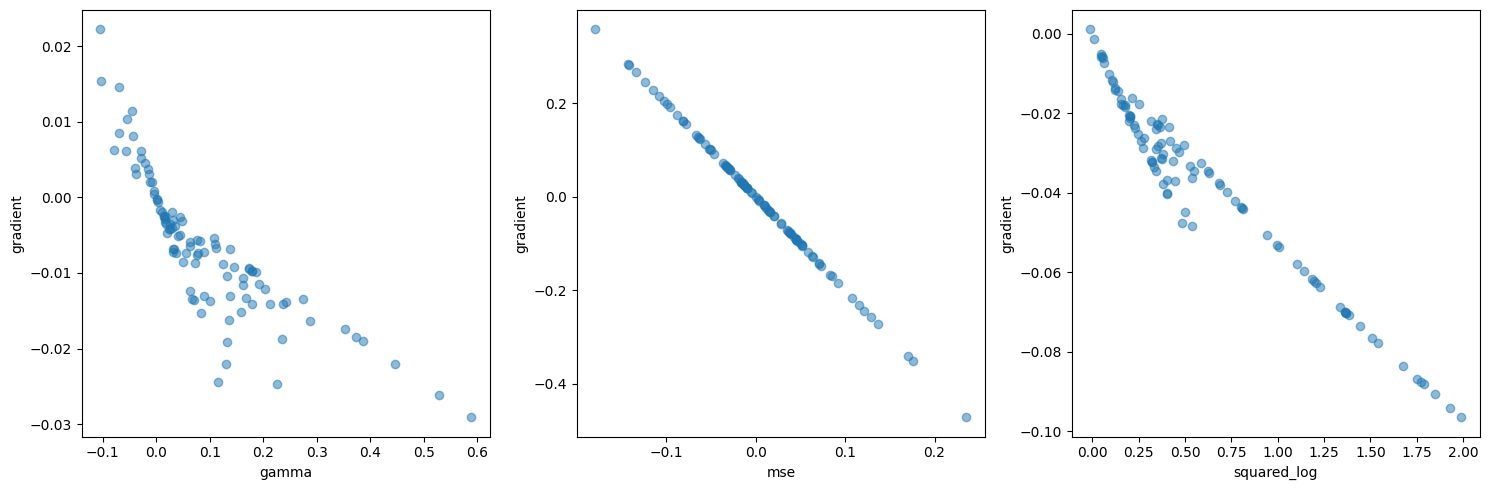

In [32]:
X = np.random.rand(100, 1)
y = 3 * X.squeeze()**2 + 2 + np.random.randn(100) * 0.1

data = DMatrix(X, label=y)

params = {
    'objective': 'reg:gamma'
}
gamma = train(params, data, num_boost_round=10)

params = {
    'objective': 'reg:squarederror'
}
mse = train(params, data, num_boost_round=10)

params = {
    'objective': 'reg:squaredlogerror' 
}
squared_log = train(params, data, num_boost_round=10)

gamma_preds = gamma.predict(data)
mse_preds = mse.predict(data)
squared_log_preds = squared_log.predict(data)

true = data.get_label()

# loss_gamma = true*np.log(true/gamma_preds) + gamma_preds
loss_gamma = true - gamma_preds
grad_gamma = (gamma_preds - true)/gamma_preds**2  

# loss_squared = (true - mse_preds)**2
loss_squared = true - mse_preds
grad_squared = 2*(mse_preds - true)

# loss_squared_log = ((np.log(squared_log_preds + 1) - np.log(true + 1))**2)/2
loss_squared_log = true - squared_log_preds
grad_squared_log = (np.log(squared_log_preds + 1) - np.log(true + 1)) / (squared_log_preds + 1)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(loss_gamma, grad_gamma, alpha=0.5)
plt.xlabel('gamma')
plt.ylabel('gradient')

plt.subplot(1, 3, 2)
plt.scatter(loss_squared, grad_squared, alpha=0.5)
plt.xlabel('mse')
plt.ylabel('gradient')

plt.subplot(1, 3, 3)
plt.scatter(loss_squared_log, grad_squared_log, alpha=0.5)
plt.xlabel('squared_log')
plt.ylabel('gradient')

plt.tight_layout()
plt.show()
